In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Machine Learning 

The basic issue in finance is that we want to know how expected returns move around, but we only observe realized returns

We can compile lots and lots of information/data about different assets

We saw how to run OLS regression of returns on a large set of characteristics ( I think it was 30)

But we didn;t even think interactions among them--say the value characteristic might have different information for returns for small vs big stocks--considering all these interactions would leads us to estimate 900 coefficients. And of course there are potentially many more characteristics and their lags that could be informative for expected returns and co-movement

You can see that very quickly you run out of data

Here where recent advances in machine learning can be super useful

In the end of the day we want to estimate a function F that maps observed characteristics in future returns


$$R_{t+1}=F(X_t)$$

This function can be linear

$$R_{t+1}=BX_t$$


 or linear in the interactions

 $$R_{t+1}=BX_t+C X_t ⊗ X_t$$

 Or have even higher order or non-linear relationships, that is instead of including the chracteristic , we include dummies according to the rank of the characteristic relative to other stocks in the cross-sectional

 Here where the tools if machine learning can be useful to us

 We will now discuss a few of the most used methods


- **Lasso Regression** (L1 regularization)
- **Random Forest Regression**
- **Gradient Boosted Regression Trees (GBRT)**
- **Elastic Net Regression** (combination of L1 and L2 regularization)
- **Neural Network Regression** (customizable number of layers)

We will apply those to our data set

We will have a training/estimation   sample (1972-1992) and a tuning sample (1992-2002) 

We will not use it today but I also reserved a test sample (2002-2016) for you to evaluate your favorite model.



In [7]:
url = "../../assets/data/characteristics_raw.csv"

df_X = pd.read_csv(url)
# This simply shits the date to be in an end of month basis


df_X['date'] = pd.to_datetime(df_X['date'], format='%m/%Y')
df_X.set_index(['date','permno'],inplace=True)

df_X['1972':'1991'].to_pickle('../../assets/data/characteristics19721991.pkl')
df_X['1992':'2001'].to_pickle('../../assets/data/characteristics19922001.pkl')
df_X['2002':].to_pickle('../../assets/data/characteristics20022016.pkl')

In [2]:
url = "../../assets/data/characteristics19721991.pkl"

df_train = pd.read_pickle(url)
df_train=df_train.drop(columns=['rf','rme'])
display(df_train)
url = "../../assets/data/characteristics19922001.pkl"
df_tuning = pd.read_pickle(url)
df_tuning=df_tuning.drop(columns=['rf','rme'])
display(df_tuning)

re       size     value      prof  fscore  debtiss  \
date       permno                                                             
1972-07-01 10006   0.028600  12.399869 -0.125361 -1.662274       1        0   
           10102   0.039757  12.217334  0.354954 -1.533574       3        0   
           10137  -0.044767  13.069874 -0.088697 -2.285618       2        1   
           10145  -0.062422  13.608366  0.075484 -1.563468       3        0   
           10153  -0.065600  11.752572  0.944457 -1.443505       2        0   
...                     ...        ...       ...       ...     ...      ...   
1991-01-01 90369   0.047830  12.802441 -0.693011 -3.167399       3        1   
           90609   0.297830  14.421899 -1.469354 -0.192073       5        0   
           91380   0.277409  14.513939 -0.929698 -0.441911       6        1   
           91695   0.110589  12.718260 -1.582293 -0.409848       5        1   
           92655   0.177596  12.899849 -1.385607 -0.341648       6        1   

                   repurch     nissa    growth  aturnover  ...    momrev  \
date       permno                                          ...             
1972-07-01 10006         0  0.691632  0.055546  -0.402127  ...  0.241023   
           10102         0  0.702357  0.032625  -0.280661  ...  0.280555   
           10137         0  0.735522  0.130297  -1.473819  ... -0.024738   
           10145         0  0.693165  0.033959  -0.210598  ...  0.529800   
           10153         1  0.688459  0.016692   0.087675  ...  0.158727   
...                    ...       ...       ...        ...  ...       ...   
1991-01-01 90369         0  0.693650  0.204222  -1.182231  ...  0.431073   
           90609         0  0.795055  0.421466   0.196485  ... -0.311436   
           91380         0  0.697018  0.092376   0.446092  ...  0.253155   
           91695         0  0.693282 -0.004634   0.234171  ... -0.006908   
           92655         0  0.884419  0.340396   0.553001  ...  0.298045   

                     valuem     nissm     strev      ivol   betaarb   indrrev  \
date       permno                                                               
1972-07-01 10006   0.046338  0.691632 -0.025281  0.015680  0.875315 -0.033445   
           10102   0.525299  0.702357 -0.066667  0.013668  1.167972 -0.029807   
           10137  -0.042177  0.735522 -0.034483  0.010347  0.755496 -0.020019   
           10145   0.062691  0.693165 -0.036735  0.018345  1.097189 -0.011115   
           10153   1.029572  0.688459 -0.107407  0.020491  1.246057 -0.079017   
...                     ...       ...       ...       ...       ...       ...   
1991-01-01 90369  -0.612392  0.692859  0.028794  0.020753  0.789805 -0.019639   
           90609  -2.001907  0.725049  0.047619  0.023579  1.373399 -0.001491   
           91380  -0.340558  0.695715  0.052273  0.026668  1.325531 -0.026854   
           91695  -1.302569  0.692102  0.117647  0.028104  0.783925  0.045506   
           92655  -1.877044  0.875576  0.148148  0.028847  1.096923  0.099715   

                      price       age     shvol  
date       permno                                
1972-07-01 10006   3.769883  5.135798  0.264547  
           10102   2.862201  5.135798  0.159992  
           10137   3.044522  5.135798  0.102413  
           10145   3.384390  5.135798  0.208178  
           10153   2.484907  5.135798  0.215979  
...                     ...       ...       ...  
1991-01-01 90369   3.496508  4.174387  0.482675  
           90609   3.496508  4.304065  1.249267  
           91380   2.442347  4.219508  0.417471  
           91695   3.167583  4.204693  0.589516  
           92655   3.146305  4.343805  1.262840  

[204284 rows x 30 columns]

re       size     value      prof  fscore  debtiss  \
date       permno                                                             
1992-01-01 10078   0.071490  14.803577 -0.821429 -0.351670       5        1   
           10095  -0.131137  13.042999 -1.288738 -2.907817       2        1   
           10104   0.272462  13.962658 -0.943996  0.072345       3        0   
           10107   0.077499  16.289499 -2.240325 -0.123331       5        1   
           10119   0.158277  13.891799 -0.598919 -2.420088       4        1   
...                     ...        ...       ...       ...     ...      ...   
2001-01-01 88664  -0.270994  14.544541 -2.222151 -0.639122       6        1   
           90100  -0.004434  14.481504 -0.821788 -1.134622       7        0   
           90609   0.647295  14.915539 -2.160840 -0.608490       6        1   
           91380  -0.009058  13.713922  0.137959 -0.303891       6        1   
           92655  -0.086296  16.449309 -0.847793 -0.821228       6        0   

                   repurch     nissa    growth  aturnover  ...    momrev  \
date       permno                                          ...             
1992-01-01 10078         0  0.713175  0.337526   0.326859  ... -0.375068   
           10095         1  0.823573  0.299850  -2.007233  ...  0.097856   
           10104         0  0.712626  0.536861   0.209624  ... -0.919460   
           10107         1  0.703894  0.427835   0.068269  ... -0.010327   
           10119         0  0.693147  0.153250  -0.435732  ...  0.056359   
...                    ...       ...       ...        ...  ...       ...   
2001-01-01 88664         1  0.706994  0.415774   0.054443  ...  0.117828   
           90100         1  0.655505  0.036674  -0.057457  ... -0.123972   
           90609         1  0.673995  0.009418  -0.422648  ... -0.183386   
           91380         1  0.699451 -0.106341   0.617338  ... -0.792238   
           92655         1  0.661662  0.057290   0.644070  ... -0.115775   

                     valuem     nissm     strev      ivol   betaarb   indrrev  \
date       permno                                                               
1992-01-01 10078  -0.827133  0.688756  0.182292  0.036514  1.279770  0.143753   
           10095  -2.439453  0.879456  0.497268  0.044026  1.046930  0.331867   
           10104  -1.741446  0.710315  0.074074  0.032754  1.434134 -0.091418   
           10107  -2.681148  0.708289  0.143959  0.013396  1.383749 -0.021534   
           10119  -0.886515  0.693128  0.098684  0.015079  0.760442 -0.015104   
...                     ...       ...       ...       ...       ...       ...   
2001-01-01 88664  -2.832748  0.734983  0.158508  0.030403  0.917149  0.241260   
           90100  -0.702888  0.694680  0.291677  0.043108  0.593961  0.162599   
           90609  -0.172097  0.679562 -0.017647  0.038304  1.443601  0.065105   
           91380  -1.032178  0.701598  0.282815  0.037141  0.831341  0.137473   
           92655  -1.687913  0.674296  0.046351  0.021378  0.834816 -0.021866   

                      price       age     shvol  
date       permno                                
1992-01-01 10078   3.345508  4.276666  1.612871  
           10095   4.226834  4.276666  2.038652  
           10104   2.674149  4.276666  1.062730  
           10107   4.711780  4.276666  0.735207  
           10119   3.038552  4.276666  0.145575  
...                     ...       ...       ...  
2001-01-01 88664   4.129148  5.214936  1.044554  
           90100   2.560130  4.997212  0.430254  
           90609   1.652258  5.267858  1.329642  
           91380   3.308351  5.236442  1.157457  
           92655   4.117003  5.283204  0.619079  

[99615 rows x 30 columns]

## 1. **Lasso Regression**
Lasso (Least Absolute Shrinkage and Selection Operator) regression is a linear regression model with L1 regularization. It minimizes the following objective:

$$
\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^n (y_i - X_i^\top \beta)^2 + \alpha \|\beta\|_1 \right)
$$

- **Key Characteristics**:
  - Shrinks some coefficients to exactly zero, effectively performing feature selection.
  - Useful for sparse models where only a subset of predictors are important.
  - Struggles with multicollinearity, as it tends to arbitrarily select one among correlated predictors.




1. **Feature Extraction**: `X` is extracted from the columns after the first 3. `Y` is the excess return.
2. **Feature Standardization**: Standardizes `X` using `StandardScaler`, which is important for Lasso because it is sensitive to feature scaling.
3. **Lasso Regression**: Fits a Lasso regression model with a specified regularization strength (`alpha`).
4. **Evaluation**: Outputs the coefficients and \( R^2 \) score on test data, if a train-test split is used.

You can adjust the `alpha` parameter in `Lasso()` to tune the regularization strength. A smaller value of `alpha` reduces regularization, while a larger value increases it.

Note that here we are implicitly using the tuning sample to pick the amount of regularization. So once we pick our favorite alpha, which looks like to 0.002, we need to look at some other sample to if that worked


In [60]:
#We will start by standardizing our characteristics. This is done by subtracting the mean and dividing by the standard deviation. 


X_train = df_train.iloc[:, 1:]
X_train= X_train.groupby('date').apply(lambda x: (x - x.mean()) / x.std())

X_tuning = df_tuning.iloc[:, 1:]
X_tuning= X_tuning.groupby('date').apply(lambda x: (x - x.mean()) / x.std())

In [62]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Extract Y (excess return) and X (characteristics)

Y_train = df_train.iloc[:, 0]   # Excess return 

Y_tuning = df_tuning.iloc[:, 0]   # Excess return 


# # Perform Lasso regression
lasso = Lasso(alpha=0.0025)  # You can adjust the alpha (regularization strength)
lasso.fit(X_train, Y_train)

# Coefficients and intercept
print("Lasso Coefficients:", lasso.coef_)
print("Intercept:", lasso.intercept_)



Y_pred = lasso.predict(X_tuning)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(Y_tuning, Y_pred)
print("Mean Squared Error (MSE):", mse)

mae= mean_absolute_error(Y_tuning, Y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(Y_tuning, Y_pred)
print("R-squared (R2):", r2)

Lasso Coefficients: [-0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.00031046 -0.          0.         -0.         -0.         -0.
 -0.         -0.00223662 -0.          0.         -0.        ]
Intercept: 0.005779088395769684
Mean Squared Error (MSE): 0.01145434617567078
Mean Absolute Error (MAE): 0.07446115851398497
R-squared (R2): -0.00030052087524023996


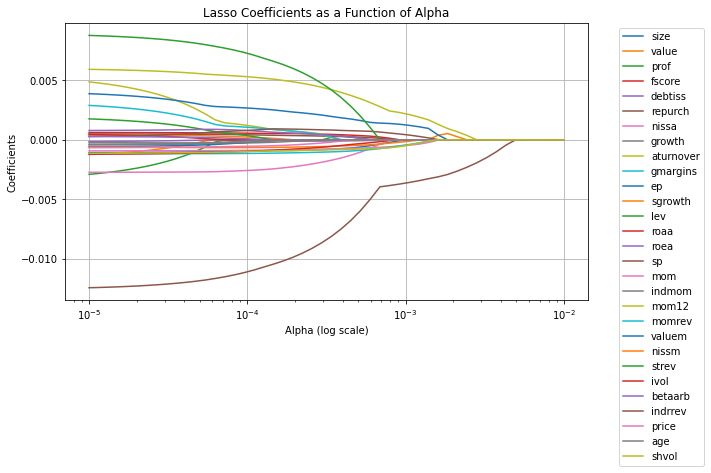

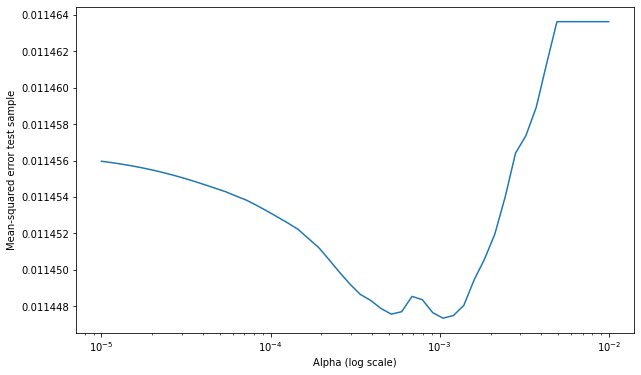

In [63]:

# Define a range of alpha values
alphas = np.logspace(-5, -2, 50)  # range for alphas
coefficients = []
mses=[]
# Perform Lasso regression for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # Ensure convergence with high iterations
    lasso.fit(X_train, Y_train)
    coefficients.append(lasso.coef_)
    Y_pred = lasso.predict(X_tuning)
    mse = mean_squared_error(Y_tuning, Y_pred)
    mses.append(mse)


# Convert coefficients to a NumPy array for plotting
coefficients = np.array(coefficients)

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i])

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.legend(df_train.iloc[:, 1:].columns, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, mses)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean-squared error test sample')
plt.xscale('log')
plt.show()



Note we are using Mean-squared error as way to evaluate our model

To compute the **Mean Squared Error (MSE)** for the Lasso model after fitting it to the training data, you can use the `mean_squared_error` function from `sklearn.metrics`. Here's how you can do it based on your original code:

Steps to Compute MSE:
1. **Make Predictions**:
   - Use `lasso.predict(X_test)` to get predictions on the test set.

2. **Compute MSE**:
   - Compare the predicted values (`Y_pred`) with the actual values (`Y_test`) using `mean_squared_error`.
   
**MSE Calculation**:
   - The formula for MSE is:
     \[
     \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
     \]
   - `mean_squared_error` automates this calculation.

 **Scaling**:
   - Ensure the test set features (`X_test`) are transformed using the same scaler fitted on the training set to maintain consistency.

Output:
- The **MSE** provides a measure of how well the model is predicting the excess returns on unseen data. Lower values indicate better performance.



In [8]:

#I will save below our lasso model at our optimal alpha
lasso = Lasso(alpha=0.002, max_iter=10000)  # Ensure convergence with high iterations
lasso.fit(X_train, Y_train)
Y_pred = lasso.predict(X_tuning)
mean_squared_error(Y_tuning, Y_pred)


0.011444912722223555

### Including Interactions


One possibility here is that the information is in the interactions of the characteristics, i.e., we want to augment the model to

$$\sum_{j=1}^N b_{j} x_{i,j}+\sum_{l=1}^N\sum_{j=1}^N b_{l,j} x_{i,l} x_{i,j}$$ 

In [9]:
from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train contains the characteristics
degree = 2  # Degree of interactions (2 means pairwise interactions)
poly = PolynomialFeatures(degree=degree, interaction_only=True, include_bias=False)

# Generate cross-product features
X_train_interactions = poly.fit_transform(X_train)
X_tuning_interactions = poly.fit_transform(X_tuning)
# Feature names (optional: useful for understanding what each column represents)
feature_names = poly.get_feature_names_out(input_features=df_train.iloc[:, 1:].columns)

# Print the shape of the transformed dataset
print("Original X_train shape:", X_train.shape)
print("Transformed X_train shape:", X_train_interactions.shape)
print("Feature Names:", feature_names)
# Get the number of input features
input_dim = X_train_interactions.shape[1]

Original X_train shape: (204284, 29)
Transformed X_train shape: (204284, 435)
Feature Names: ['size' 'value' 'prof' 'fscore' 'debtiss' 'repurch' 'nissa' 'growth'
 'aturnover' 'gmargins' 'ep' 'sgrowth' 'lev' 'roaa' 'roea' 'sp' 'mom'
 'indmom' 'mom12' 'momrev' 'valuem' 'nissm' 'strev' 'ivol' 'betaarb'
 'indrrev' 'price' 'age' 'shvol' 'size value' 'size prof' 'size fscore'
 'size debtiss' 'size repurch' 'size nissa' 'size growth' 'size aturnover'
 'size gmargins' 'size ep' 'size sgrowth' 'size lev' 'size roaa'
 'size roea' 'size sp' 'size mom' 'size indmom' 'size mom12' 'size momrev'
 'size valuem' 'size nissm' 'size strev' 'size ivol' 'size betaarb'
 'size indrrev' 'size price' 'size age' 'size shvol' 'value prof'
 'value fscore' 'value debtiss' 'value repurch' 'value nissa'
 'value growth' 'value aturnover' 'value gmargins' 'value ep'
 'value sgrowth' 'value lev' 'value roaa' 'value roea' 'value sp'
 'value mom' 'value indmom' 'value mom12' 'value momrev' 'value valuem'
 'value nissm' '

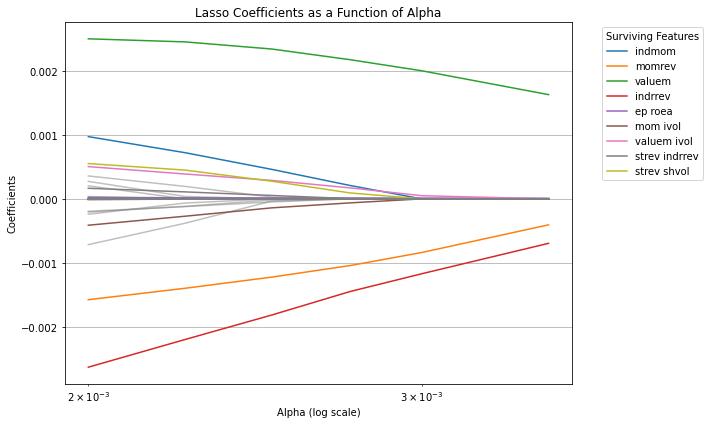

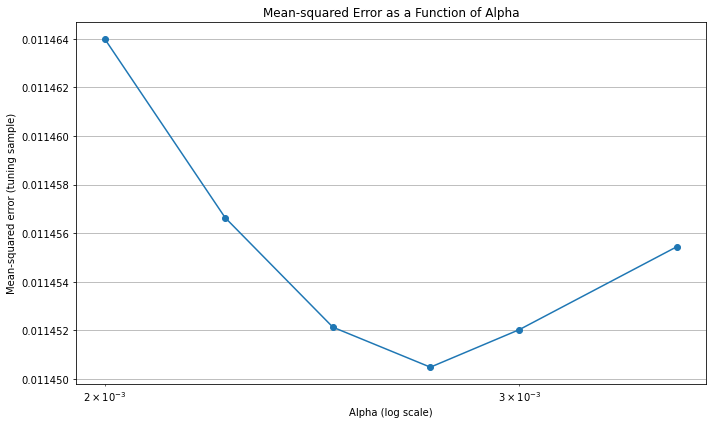

In [16]:
# Define a range of alpha values
alphas = [0.002,0.00225,0.0025,0.00275,0.003,0.0035]  # range for alphas
coefficients = []
mses=[]
# Perform Lasso regression for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # Ensure convergence with high iterations
    lasso.fit(X_train_interactions, Y_train)
    coefficients.append(lasso.coef_)
    Y_pred = lasso.predict(X_tuning_interactions)
    mse = mean_squared_error(Y_tuning, Y_pred)
    mses.append(mse)


# Convert coefficients to a NumPy array for plotting
coefficients = np.array(coefficients)


alpha_index = alphas.index(0.00275)
surviving_features = np.where(coefficients[alpha_index, :] != 0)[0]

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    if i in surviving_features:
        # Plot surviving features with legend
        plt.plot(alphas, coefficients[:, i], label=feature_names[i])
    else:
        # Plot non-surviving features without legend
        plt.plot(alphas, coefficients[:, i], color='gray', alpha=0.5)

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Surviving Features")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Mean-squared error for tuning sample
plt.figure(figsize=(10, 6))
plt.plot(alphas, mses, marker='o')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean-squared error (tuning sample)')
plt.xscale('log')
plt.title('Mean-squared Error as a Function of Alpha')
plt.grid(True)
plt.tight_layout()
plt.show()

Note that there is virtually no improvement out of sample

### Non-Parametric Models

Instead of assuming that the relationship between the dependent variable $ y \) and the characteristic \( size \) is linear, we consider a more flexible model. In this approach, the relationship is linear in terms of the **percentiles** of the characteristic.

#### Original Linear Model
In a linear regression, the model is typically expressed as:

$$
y_{i, t+1} = \beta \cdot size_{i, t}
$$

where:
- $ y_{i, t+1} $: The dependent variable (e.g., return of asset $ i $ at time $ t+1 $).
- $ size_{i, t} $: A characteristic of asset $ i $ at time $ t $ (e.g., market capitalization).
- $ \beta $: A regression coefficient indicating the relationship between $ size_{i, t} $ and $ y_{i, t+1} $.

#### Non-Parametric Percentile-Based Model
To introduce non-linearity, we instead model $ y_{i, t+1} $ as a function of the percentiles of $ size $ within each time period. The model becomes:

\[
y_{i, t+1} = \sum_p \beta_p \cdot 1_{\{size_{i, t} \in \text{Percentile}(p, \text{size}_t)\}}
\]

where:
- $ p $: The percentile group (e.g., $ p = 1 $ for the 0-20% percentile, $ p = 2 $ for the 20-40% percentile, etc.).
- $ \beta_p $: The regression coefficient for percentile $ p $.
- $ 1_{\{size_{i, t} \in \text{Percentile}(p, \text{size}_t)\}} $: An indicator function that equals 1 if $ size_{i, t} $ falls in the $ p $-th percentile of the $ size $ distribution for time $ t $, and 0 otherwise.

#### Explanation
1. **Intuition**: Instead of assuming a linear relationship between $ y $ and $ size $, the model captures how $ y $ varies across different percentile ranges of $ size $.
2. **Flexibility**: The model allows for different effects ($ \beta_p $) for each percentile range, enabling it to capture non-linear relationships.
3. **Interpretation**: For example, $ \beta_1 $ represents the average effect of assets in the lowest 20% of $ size $ on $ y $, while $ \beta_5 $ represents the effect for assets in the highest 20%.

This approach is particularly useful when the relationship between $ y $ and $ size $ is not well-approximated by a straight line but instead varies across different ranges of $ size $.

In [34]:

# Define the number of percentiles
num_percentiles = 5

# Initialize an empty list to store the new columns
new_columns = []
df=df_train.iloc[:, 1:].copy()
# Loop through each characteristic
for characteristic in df.columns:
    # Group by date and calculate percentiles
    grouped = df[characteristic].groupby(level='date')
    
    # Apply percentile binning for each date
    percentile_bins = grouped.apply(
        lambda x: pd.qcut(x, q=num_percentiles, labels=False, duplicates='drop')  # Bins from 0 to 4
    )
    
    # Create binary columns for each percentile
    for percentile in range(num_percentiles):
        col_name = f"{characteristic}_p{percentile+1}"
        df[col_name] = (percentile_bins == percentile).astype(int)
        df=df.copy()
        new_columns.append(col_name)

# Keep the new columns only for verification (if needed)
new_characteristics_df = df[new_columns].copy()

# Output the shape of the new DataFrame
print("Original DataFrame shape:", df_train.iloc[:, 1:].shape)
print("New DataFrame shape after adding percentiles:", new_characteristics_df.shape)
new_characteristics_df

Original DataFrame shape: (204284, 29)
New DataFrame shape after adding percentiles: (204284, 145)


size_p1  size_p2  size_p3  size_p4  size_p5  value_p1  \
date       permno                                                          
1972-07-01 10006         0        0        1        0        0         0   
           10102         0        1        0        0        0         0   
           10137         0        0        0        1        0         0   
           10145         0        0        0        1        0         0   
           10153         1        0        0        0        0         0   
...                    ...      ...      ...      ...      ...       ...   
1991-01-01 90369         1        0        0        0        0         0   
           90609         0        0        0        1        0         1   
           91380         0        0        0        1        0         0   
           91695         1        0        0        0        0         1   
           92655         1        0        0        0        0         1   

                   value_p2  value_p3  value_p4  value_p5  ...  age_p1  \
date       permno                                          ...           
1972-07-01 10006          0         0         1         0  ...       0   
           10102          0         0         0         1  ...       0   
           10137          0         0         1         0  ...       0   
           10145          0         0         0         1  ...       0   
           10153          0         0         0         1  ...       0   
...                     ...       ...       ...       ...  ...     ...   
1991-01-01 90369          0         1         0         0  ...       1   
           90609          0         0         0         0  ...       1   
           91380          1         0         0         0  ...       1   
           91695          0         0         0         0  ...       1   
           92655          0         0         0         0  ...       1   

                   age_p2  age_p3  age_p4  age_p5  shvol_p1  shvol_p2  \
date       permno                                                       
1972-07-01 10006        0       1       0       0         0         0   
           10102        0       1       0       0         0         0   
           10137        0       1       0       0         0         1   
           10145        0       1       0       0         0         0   
           10153        0       1       0       0         0         0   
...                   ...     ...     ...     ...       ...       ...   
1991-01-01 90369        0       0       0       0         0         0   
           90609        0       0       0       0         0         0   
           91380        0       0       0       0         0         0   
           91695        0       0       0       0         0         0   
           92655        0       0       0       0         0         0   

                   shvol_p3  shvol_p4  shvol_p5  
date       permno                                
1972-07-01 10006          0         1         0  
           10102          1         0         0  
           10137          0         0         0  
           10145          0         1         0  
           10153          0         1         0  
...                     ...       ...       ...  
1991-01-01 90369          0         1         0  
           90609          0         0         1  
           91380          1         0         0  
           91695          0         1         0  
           92655          0         0         1  

[204284 rows x 145 columns]

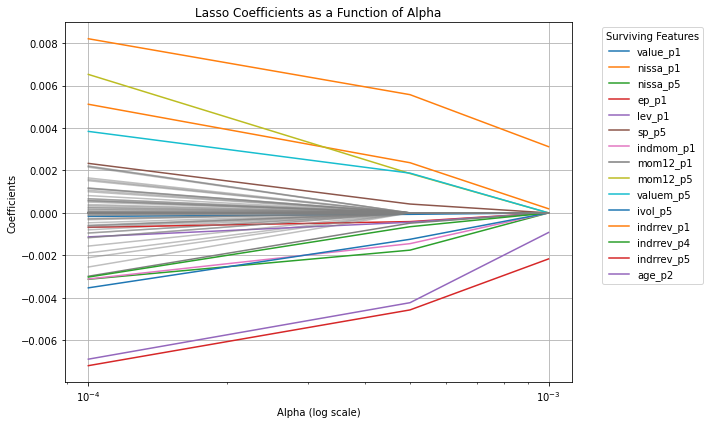

In [33]:
# Define a range of alpha values
alphas = [0.0001,0.0005,0.001]  # range for alphas
coefficients = []
mses=[]
# Perform Lasso regression for each alpha
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)  # Ensure convergence with high iterations
    lasso.fit(new_characteristics_df.values, Y_train)
    coefficients.append(lasso.coef_)



# Convert coefficients to a NumPy array for plotting
coefficients = np.array(coefficients)


alpha_index = alphas.index(0.0005)
surviving_features = np.where(coefficients[alpha_index, :] != 0)[0]

# Plot the coefficients as a function of alpha
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    if i in surviving_features:
        # Plot surviving features with legend
        plt.plot(alphas, coefficients[:, i], label=new_characteristics_df.columns[i])
    else:
        # Plot non-surviving features without legend
        plt.plot(alphas, coefficients[:, i], color='gray', alpha=0.5)

plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Surviving Features")
plt.grid(True)
plt.tight_layout()
plt.show()



---

### 2. **Random Forest Regression**


![Neural Networks](../../assets/plots/regressionTree.jpg)


Random Forest is an ensemble method that combines multiple decision trees to make predictions. Each tree is trained on a bootstrap sample of the data, and predictions are averaged:

$$
\hat{y} = \frac{1}{T} \sum_{t=1}^T h_t(X)
$$

Where $ h_t(X) $ is the prediction of the \( t \)-th tree.

- **Key Characteristics**:
  - Reduces overfitting by averaging predictions across trees.
  - Handles non-linear relationships and interactions between features well.
  - Relatively robust to noisy data and outliers.
  - Does not extrapolate beyond the range of the training data.


1. **Random Forest Regressor**:
   - A `RandomForestRegressor` is initialized with:
     - `n_estimators=100`: Builds 100 decision trees.
     - `max_depth=None`: Allows trees to grow until all leaves are pure or contain less than the minimum samples.
     - `random_state=42`: Ensures reproducibility.
     - `n_jobs=-1`: Utilizes all available CPU cores for faster training.


2. **Feature Importances**:
   - The relative importance of each feature is extracted using the `feature_importances_` attribute and displayed in a sorted DataFrame.



3. Adjusting Hyperparameters:
- You can tune the following hyperparameters to optimize model performance:
  - `n_estimators`: Increase or decrease the number of trees.
  - `max_depth`: Limit the depth of trees to prevent overfitting.
  - `min_samples_split`: Minimum number of samples required to split an internal node.
  - `min_samples_leaf`: Minimum number of samples required to be at a leaf node.


In [47]:

from sklearn.ensemble import RandomForestRegressor




# Build the Random Forest Regressor
random_forest = RandomForestRegressor(
    n_estimators=250,  # Number of trees in the forest
    max_depth=10,    # Maximum depth of the trees
    random_state=42,   # Ensures reproducibility
    n_jobs=-1          # Use all available cores for training
)

# Train the Random Forest model
random_forest.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = random_forest.predict(X_tuning)

# Evaluate the model
mse = mean_squared_error(Y_tuning, Y_pred)
r2 = r2_score(Y_tuning, Y_pred)

mse = mean_squared_error(Y_tuning, Y_pred)
print("Mean Squared Error (MSE):", mse)

mae= mean_absolute_error(Y_tuning, Y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(Y_tuning, Y_pred)
print("R-squared (R2):", r2)

# Optional: Feature importance
feature_importances = random_forest.feature_importances_
feature_names = df_train.iloc[:, 1:].columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Mean Squared Error (MSE): 0.01148951126275974
Mean Absolute Error (MAE): 0.07460830016978094
R-squared (R2): -0.003371464811474878

Feature Importances:
      Feature  Importance
27        age    0.186314
26      price    0.086422
25    indrrev    0.065550
16        mom    0.065456
22      strev    0.064356
19     momrev    0.053585
18      mom12    0.052670
10         ep    0.048531
28      shvol    0.045249
17     indmom    0.038484
24    betaarb    0.034132
23       ivol    0.030491
0        size    0.029805
20     valuem    0.028786
8   aturnover    0.017810
21      nissm    0.017426
11    sgrowth    0.016147
2        prof    0.014705
1       value    0.013960
15         sp    0.013442
6       nissa    0.012874
13       roaa    0.012841
7      growth    0.012358
9    gmargins    0.011966
14       roea    0.011521
12        lev    0.010726
3      fscore    0.002920
4     debtiss    0.000890
5     repurch    0.000584



---

### 4. **Gradient Boosted Regression Trees (GBRT)**
GBRT is an ensemble technique that builds trees sequentially, where each tree corrects the errors of the previous one. The prediction is updated iteratively:

$$
\hat{y}_t(X) = \hat{y}_{t-1}(X) + \nu \cdot g_t(X)
$$

Where:
- $ g_t(X) $: Gradient of the loss function with respect to predictions.
- $ \nu$: Learning rate, controlling the contribution of each tree.

- **Key Characteristics**:
  - Optimizes a differentiable loss function (e.g., squared error for regression).
  - Can capture complex, non-linear patterns in the data.
  - Requires careful tuning of hyperparameters (e.g., learning rate, number of trees, maximum tree depth).



1. **Gradient Boosted Regression Trees**:
   - A `GradientBoostingRegressor` is initialized with:
     - `n_estimators=100`: Builds 100 trees.
     - `learning_rate=0.1`: Controls the contribution of each tree to the final prediction.
     - `max_depth=3`: Limits the depth of individual trees to prevent overfitting.
     - `random_state=42`: Ensures reproducibility.


2. **Adjusting Hyperparameters**:
- You can tune the following hyperparameters to optimize the model:
  - `n_estimators`: Increase for more stages of boosting.
  - `learning_rate`: Decrease for smaller incremental updates (often requires increasing `n_estimators`).
  - `max_depth`: Control tree depth to balance bias and variance.
  - `subsample`: Use a fraction of samples for each stage (e.g., `subsample=0.8` for 80% of the data).





In [53]:

from sklearn.ensemble import GradientBoostingRegressor




# Build the Gradient Boosting Regressor
gbrt = GradientBoostingRegressor(
    n_estimators=300,       # Number of boosting stages to perform
    learning_rate=0.2,      # Shrinks the contribution of each tree
    max_depth=5,            # Maximum depth of each tree
    random_state=42         # Ensures reproducibility
)

# Train the Gradient Boosting model
gbrt.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = gbrt.predict(X_tuning)

# Evaluate the model
mse = mean_squared_error(Y_tuning, Y_pred)
r2 = r2_score(Y_tuning, Y_pred)

mse = mean_squared_error(Y_tuning, Y_pred)
print("Mean Squared Error (MSE):", mse)

mae= mean_absolute_error(Y_tuning, Y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(Y_tuning, Y_pred)
print("R-squared (R2):", r2)

# Optional: Feature importance
feature_importances = gbrt.feature_importances_
feature_names = df_train.iloc[:, 1:].columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Mean Squared Error (MSE): 0.012230932833230374
Mean Absolute Error (MAE): 0.07760391337870105
R-squared (R2): -0.06811932311395719

Feature Importances:
      Feature  Importance
27        age    0.294144
16        mom    0.057104
22      strev    0.055204
18      mom12    0.052066
19     momrev    0.050959
28      shvol    0.045834
25    indrrev    0.045597
26      price    0.040428
17     indmom    0.040013
24    betaarb    0.035627
10         ep    0.029968
20     valuem    0.027339
23       ivol    0.027101
0        size    0.024653
21      nissm    0.018743
8   aturnover    0.017848
15         sp    0.016247
11    sgrowth    0.016003
6       nissa    0.015233
7      growth    0.014040
12        lev    0.013535
1       value    0.013454
9    gmargins    0.013224
2        prof    0.013146
14       roea    0.010066
13       roaa    0.008488
3      fscore    0.002793
5     repurch    0.000652
4     debtiss    0.000489




---

### 5. **Elastic Net Regression**
Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization to balance feature selection and multicollinearity handling. The objective function is:

$$
\min_{\beta} \left( \frac{1}{2n} \sum_{i=1}^n (y_i - X_i^\top \beta)^2 + \alpha_1 \|\beta\|_1 + \alpha_2 \|\beta\|_2^2 \right)
$$

Where:
- $ \|\beta\|_1 $: Lasso penalty encourages sparsity.
- $ \|\beta\|_2^2 $: Ridge penalty shrinks coefficients to reduce multicollinearity.

- **Key Characteristics**:
  - Balances Lasso's feature selection and Ridge's stability with correlated predictors.
  - Controlled by two hyperparameters:
    - $ \alpha $: Overall regularization strength.
    - $ \rho $ (mixing ratio): Balance between L1 and L2 penalties.




1. **Elastic Net Regressor**:
   - The `ElasticNet` regressor is initialized with:
     - `alpha=0.1`: Controls the overall strength of regularization.
     - `l1_ratio=0.5`: Specifies the mix of L1 (Lasso) and L2 (Ridge) penalties:
       -  l1_ratio=0 : Equivalent to Ridge regression.
       -  l1_ratio=1 : Equivalent to Lasso regression.
       -  l1_ratio=0.5 : Balances L1 and L2 penalties.
     - `random_state=42`: Ensures reproducibility.

2. **Adjusting Hyperparameters**:
- **`alpha`**:
  - Larger values apply stronger regularization, reducing overfitting but increasing bias.
- **`l1_ratio`**:
  - Adjust to control the balance between L1 and L2 penalties:
    - Increase towards 1 for more sparsity (feature selection).
    - Decrease towards 0 to favor Ridge-like behavior (handles multicollinearity).





In [57]:
from sklearn.linear_model import ElasticNet

# Initialize and train the Elastic Net regressor
elastic_net = ElasticNet(
    alpha=0.005,       # Regularization strength (higher values = stronger penalty)
    l1_ratio=0.5,    # Balance between L1 (Lasso) and L2 (Ridge) regularization
    random_state=42  # Ensures reproducibility
)

# Train the Elastic Net model
elastic_net.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = elastic_net.predict(X_tuning)

# Evaluate the model
mse = mean_squared_error(Y_tuning, Y_pred)
r2 = r2_score(Y_tuning, Y_pred)

mse = mean_squared_error(Y_tuning, Y_pred)
print("Mean Squared Error (MSE):", mse)

mae= mean_absolute_error(Y_tuning, Y_pred)
print("Mean Absolute Error (MAE):", mae)

r2 = r2_score(Y_tuning, Y_pred)
print("R-squared (R2):", r2)

# Print the coefficients
coefficients = pd.DataFrame({
    'Feature': df_train.iloc[:, 1:].columns,
    'Coefficient': elastic_net.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nCoefficients:")
print(coefficients)


Mean Squared Error (MSE): 0.01144784660786539
Mean Absolute Error (MAE): 0.07444204750342037
R-squared (R2): 0.0002670821080715813

Coefficients:
      Feature  Coefficient
20     valuem     0.002396
17     indmom     0.000461
15         sp     0.000052
0        size    -0.000000
1       value     0.000000
27        age     0.000000
26      price    -0.000000
24    betaarb    -0.000000
23       ivol     0.000000
22      strev     0.000000
21      nissm    -0.000000
18      mom12     0.000000
16        mom    -0.000000
14       roea     0.000000
13       roaa     0.000000
12        lev     0.000000
11    sgrowth     0.000000
10         ep     0.000000
9    gmargins    -0.000000
8   aturnover     0.000000
7      growth    -0.000000
6       nissa    -0.000000
5     repurch     0.000000
4     debtiss    -0.000000
3      fscore     0.000000
2        prof     0.000000
28      shvol    -0.000000
19     momrev    -0.001270
25    indrrev    -0.001636



---



### 6. **Neural Network Regression**

![Neural Networks](../../assets/plots/neural_networks.jpg)

A neural network is a flexible, non-linear model that uses layers of neurons to approximate complex relationships between inputs (\( X \)) and outputs (\( Y \)). The simplest form of a feedforward neural network can be expressed as:

$$
\hat{y} = f(W^{[L]} \sigma(W^{[L-1]} \dots \sigma(W^{[1]} X + b^{[1]}) + b^{[L-1]}) + b^{[L]}
$$

- **Key Characteristics**:
  - Consists of an input layer, hidden layers, and an output layer.
  - Activation functions ($\sigma$, e.g., ReLU or sigmoid) introduce non-linearity.
    - $ReLU(x)=max(0,x)$
    - $Sigmoid(x)=1/(1+e^{−x})$
  - The number of layers and neurons can be tuned to fit data complexity.
  - Requires careful tuning of hyperparameters (e.g., learning rate, number of layers, epochs).


  
1. **Building the Neural Network**:
   - **Function `build_and_train_model`**:
     - **Parameters**:
       - `num_layers`: Number of layers in the neural network (free parameter).
       - `input_dim`: Number of input features (dimensions).

     - **Model Architecture**:
       - **Input Layer**:
         - Uses `Dense` layer with 64 neurons and `relu` activation function.
         - `input_dim` specifies the number of input features.
       - **Hidden Layers**:
         - Adds additional hidden layers based on `num_layers`.
         - Each hidden layer has 64 neurons with `relu` activation.
       - **Output Layer**:
         - A single neuron without activation (linear activation) for regression output.
     - **Compilation**:
       - Uses the `adam` optimizer and `mean_squared_error` loss function suitable for regression tasks.
     - **Training**:
          In addition to the network structure (layers and neurons), you also have to pick parameters that control the training process


          Epochs: Controls the total number of training cycles. More epochs mean more opportunities for the model to learn, but excessive epochs can lead to overfitting.

          Batch Size: Controls how the dataset is split into smaller subsets for gradient updates. Balances memory usage and convergence speed.

          Validation Split: Reserves a portion of the data to monitor generalization during training and guide callbacks like early stopping.


          By carefully tuning these parameters, you can balance training efficiency, model generalization, and computational resources.


 Adjusting the Number of Layers:

- **Free Parameter**:
  - You can adjust the `num_layers` variable to change the depth of the neural network.
  - For example, setting `num_layers = 5` will create a network with one input layer and four hidden layers.

 Additional Considerations:

- **Hyperparameter Tuning**:
  - You might want to experiment with different numbers of neurons, activation functions, epochs, and batch sizes to improve model performance.





  

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [42]:
def build_and_train_model(num_layers, input_dim, X_train, Y_train,neurons,validation_data,epochs):
    """
    Builds and trains a neural network model.

    Parameters:
    - num_layers: int, number of layers in the neural network
    - input_dim: int, number of input features
    - X_train: training features
    - Y_train: training target

    Returns:
    - model: Trained Keras model
    """
    model = Sequential()
    # Add the input layer

    model.add(Dense(neurons, activation='relu', input_dim=input_dim))

    # Add hidden layers
    for _ in range(num_layers - 1):
        neurons = max(1, int(neurons * 0.5)) 
        model.add(Dense(neurons, activation='relu'))

    # Add the output layer
    model.add(Dense(1))  # Single neuron for regression output

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(
        X_train, Y_train,
        epochs=epochs,                # You can adjust the number of epochs
        batch_size=128,            # You can adjust the batch size
        validation_data=validation_data,    
    )
    return model

# Specify the number of layers (free parameter)
num_layers = 5  # Adjust this number as needed


input_dim = X_train.shape[1]

# Build and train the model
model = build_and_train_model(2, input_dim, X_train ,Y_train.values,16,(X_tuning, Y_tuning.values),epochs=10)



Epoch 1/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0362 - val_loss: 0.0121
Epoch 2/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0098 - val_loss: 0.0117
Epoch 3/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0096 - val_loss: 0.0115
Epoch 4/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0096 - val_loss: 0.0118
Epoch 5/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0095 - val_loss: 0.0116
Epoch 6/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0095 - val_loss: 0.0115
Epoch 7/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0093 - val_loss: 0.0116
Epoch 8/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0094 - val_loss: 0.0116
Epoch 9/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0094 - val_loss: 0.0116
Epoch 10/10
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0093 - val_loss: 0.0116


In [52]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.



### The Whole Shebang


You can potentially combine the Non-Parametric Percentile-Based Model with the interactions. 

The key issue is tha as you make the model richer and richer the scope for the training to produce garabage increases

You need to do much more validation/model regularization

Examples include

- L1 regularization:L1 regularization adds a penalty to the loss function based on the absolute values of the weights, encouraging sparsity by driving some weights to zero. This prevents overfitting and simplifies the model, making it useful in high-dimensional data or feature selection.
- Early stopping: Early stopping monitors validation loss during training and halts when the loss stops improving, preventing overfitting. It ensures the model generalizes well and avoids unnecessary training.
- Batch normalization: Batch normalization normalizes layer inputs to have a mean of 0 and variance of 1, speeding up training and reducing sensitivity to initialization. It also acts as a regularizer by introducing noise during training.
- Ensembles: Ensembles combine predictions from multiple models, reducing variance and improving accuracy. They are effective for generalization but increase computational cost.



---

## Wrap up


Comparison  Table across methods

| **Model**                  | **Type**       | **Key Strengths**                                        | **Limitations**                            |
|----------------------------|----------------|----------------------------------------------------------|--------------------------------------------|
| Lasso Regression           | Linear         | Feature selection, interpretable coefficients           | Struggles with multicollinearity           |
| Neural Network Regression   | Non-linear     | Flexible, captures complex patterns                     | Requires significant tuning and data       |
| Random Forest Regression    | Non-linear     | Robust to overfitting, handles feature interactions well | Computationally expensive for large data   |
| GBRT                       | Non-linear     | Accurate, optimizes for specific loss functions         | Sensitive to hyperparameters, overfitting  |
| Elastic Net Regression      | Linear         | Handles multicollinearity, balances selection & stability | Can be slower than Ridge or Lasso          |

Let me know if you’d like additional detail or comparisons!

For an academic investigation of these methods see  "Empirical Asset Pricing via Machine Learning" (https://academic.oup.com/rfs/article/33/5/2223/5758276?login=true). The figures used in this notebook are also from that paper.